In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_ollama import ChatOllama

In [2]:
# loading model
model = ChatOllama(model='gemma3:4b')

In [3]:
# define State
class LLMState(TypedDict):
    
    question: str
    answer: str

In [4]:
def llm_qa(state: LLMState) -> LLMState:
    
    # extract the question from state
    question = state['question']
    
    # form a prompt
    prompt = f"Answer the following question {question}"
    
    # ask that question to the LLM
    answer = model.invoke(prompt).content
    
    # update the answer in the state
    state['answer'] = answer
    
    return state

In [12]:
# define your graph
graph = StateGraph(LLMState)

# add nodes to your graph
graph.add_node("llm_qa", llm_qa)

# add edged to your graph
graph.add_edge(START, "llm_qa")
graph.add_edge("llm_qa", END)

# compile the graph
workflow = graph.compile()


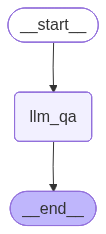

In [13]:
# model diagram
workflow

In [9]:
# execute the graph
initial_state = {"question": "How far is Moon from the Earth?"}

final_state = workflow.invoke(initial_state)

print(final_state)

{'question': 'How far is Moon from the Earth?', 'answer': "That’s a fantastic question, and the answer is… it’s complicated! The distance between the Earth and the Moon isn’t a fixed number because the Moon’s orbit is an ellipse, not a perfect circle.\n\nHere's a breakdown:\n\n* **Average Distance:** Approximately **384,400 kilometers (238,855 miles)**. This is the number you’ll most often hear.\n* **Perigee (Closest Point):** Around **363,104 kilometers (225,623 miles)**.\n* **Apogee (Farthest Point):** Around **405,696 kilometers (252,088 miles)**.\n\n**Think of it like this:** The Moon is constantly moving around the Earth, and its distance changes throughout its orbit.\n\nDo you want to know more about why the orbit is elliptical, or about the Moon’s phases?"}


In [10]:
final_state['answer']

"That’s a fantastic question, and the answer is… it’s complicated! The distance between the Earth and the Moon isn’t a fixed number because the Moon’s orbit is an ellipse, not a perfect circle.\n\nHere's a breakdown:\n\n* **Average Distance:** Approximately **384,400 kilometers (238,855 miles)**. This is the number you’ll most often hear.\n* **Perigee (Closest Point):** Around **363,104 kilometers (225,623 miles)**.\n* **Apogee (Farthest Point):** Around **405,696 kilometers (252,088 miles)**.\n\n**Think of it like this:** The Moon is constantly moving around the Earth, and its distance changes throughout its orbit.\n\nDo you want to know more about why the orbit is elliptical, or about the Moon’s phases?"

In [11]:
# to see graph diagram
workflow.get_graph().print_ascii()

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
  +--------+   
  | llm_qa |   
  +--------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   
